## Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


#### The company wants to know:

 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands

#### Business Goal:
 - Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
 - It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

### Data Understanding:
   - instant: record index
   - dteday : date
   - season : season (1:spring, 2:summer, 3:fall, 4:winter)
   - yr : year (0: 2018, 1:2019)
   - mnth : month ( 1 to 12)
   - holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
   - weekday : day of the week
   - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
   + weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
   - temp : temperature in Celsius
   - atemp: feeling temperature in Celsius
   - hum: humidity
   - windspeed: wind speed
   - casual: count of casual users
   - registered: count of registered users
   - cnt: count of total rental bikes including both casual and registered
	

### Step 1: Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

### Step 2: Reading Dataset

In [2]:
bike = pd.read_csv("day.csv")

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


###  Step 3: Cleaning and Understanding Data

##### Here, we are updating numerical values of Season with categorical values

In [6]:
def season_map(x):
    return x.map({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"})

In [7]:
bike[['season_cat']] = bike[['season']].apply(season_map)

In [8]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_cat
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,Spring
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,Spring
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,Spring
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,Spring
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,Spring


##### Here, we are updating numerical values of Month with categorical values

In [9]:
bike['month'] = bike['mnth'].apply(lambda x: calendar.month_abbr[x])

In [10]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_cat,month
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,Spring,Jan
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,Spring,Jan
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,Spring,Jan
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,Spring,Jan
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,Spring,Jan


##### Here, we are updating numerical values of Year with categorical values

In [11]:
def year_map(x):
    return x.map({0:2018, 1:2019})

In [12]:
bike[['year']] = bike[['yr']].apply(year_map)

In [13]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_cat,month,year
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,Spring,Jan,2018
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,Spring,Jan,2018
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,Spring,Jan,2018
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,Spring,Jan,2018
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,Spring,Jan,2018


##### Here, we are updating numerical values of Weekday with categorical values

In [14]:
def day_map(x):
    return x.map({0:"Tuesday", 1:"Wednesday", 2:"Thursday", 3:"Friday", 4:"Saturday", 5:"Sunday", 6:"Monday"})

In [15]:
bike[['day of week']] = bike[['weekday']].apply(day_map)

In [16]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_cat,month,year,day of week
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,Spring,Jan,2018,Monday
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,Spring,Jan,2018,Tuesday
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,Spring,Jan,2018,Wednesday
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,Spring,Jan,2018,Thursday
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,Spring,Jan,2018,Friday


##### Here, we are updating numerical values of Weather with categorical values

In [17]:
def weather_map(x):
    return x.map({1:"Clear To Cloudy", 2:"Mist to Cloudy", 3:"Light Snow/Rain", 4:"Heavy Snow/Rain"})

In [18]:
bike[['weather']] = bike[['weathersit']].apply(weather_map)

In [19]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,season_cat,month,year,day of week,weather
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,...,80.5833,10.749882,331,654,985,Spring,Jan,2018,Monday,Mist to Cloudy
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,...,69.6087,16.652113,131,670,801,Spring,Jan,2018,Tuesday,Mist to Cloudy
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,...,43.7273,16.636703,120,1229,1349,Spring,Jan,2018,Wednesday,Clear To Cloudy
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,...,59.0435,10.739832,108,1454,1562,Spring,Jan,2018,Thursday,Clear To Cloudy
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,...,43.6957,12.522300,82,1518,1600,Spring,Jan,2018,Friday,Clear To Cloudy


##### Checking and listing all columns of data set

In [20]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_cat', 'month', 'year',
       'day of week', 'weather'],
      dtype='object')

##### Dropping or removing unwanted columns

In [21]:
# Droping instant column as it is index column which has nothing to do with target
bike.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bike.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columns as as we have cnt column which is sum of the both that is the target column
bike.drop(['casual'], axis = 1, inplace = True)
bike.drop(['registered'], axis = 1, inplace = True)

# Dropping Numerical column of season
bike.drop(['season'], axis = 1, inplace = True)

# Dropping Numerical column of weathersit
bike.drop(['weathersit'], axis = 1, inplace = True)

# Dropping Numerical column of weekday
bike.drop(['weekday'], axis = 1, inplace = True)

# Dropping Numerical column of mnth
bike.drop(['mnth'], axis = 1, inplace = True)

In [22]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_cat,month,year,day of week,weather
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,Spring,Jan,2018,Monday,Mist to Cloudy
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,Spring,Jan,2018,Tuesday,Mist to Cloudy
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,Spring,Jan,2018,Wednesday,Clear To Cloudy
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,Spring,Jan,2018,Thursday,Clear To Cloudy
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,Spring,Jan,2018,Friday,Clear To Cloudy


##### Here, we are renaming columns to have understanding of columns

In [23]:
bike.rename(columns = {'holiday':'Holiday', 'workingday':'Workingday', 'temp':'Temp', 'atemp':'Atemp', 'hum':'Humidity',
                      'windspeed':'Windspeed', 'cnt':'Count', 'season_cat':'Season','month':'Month', 'year':'Year','yr':'Year 1',
                      'day of week':'Day of Week', 'weather':'Weather'}, inplace=True)

In [24]:
bike.head()

,Year 1,Holiday,Workingday,Temp,Atemp,Humidity,Windspeed,Count,Season,Month,Year,Day of Week,Weather
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,Spring,Jan,2018,Monday,Mist to Cloudy
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,Spring,Jan,2018,Tuesday,Mist to Cloudy
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,Spring,Jan,2018,Wednesday,Clear To Cloudy
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,Spring,Jan,2018,Thursday,Clear To Cloudy
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,Spring,Jan,2018,Friday,Clear To Cloudy


In [25]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year 1       730 non-null    int64  
 1   Holiday      730 non-null    int64  
 2   Workingday   730 non-null    int64  
 3   Temp         730 non-null    float64
 4   Atemp        730 non-null    float64
 5   Humidity     730 non-null    float64
 6   Windspeed    730 non-null    float64
 7   Count        730 non-null    int64  
 8   Season       730 non-null    object 
 9   Month        730 non-null    object 
 10  Year         730 non-null    int64  
 11  Day of Week  730 non-null    object 
 12  Weather      730 non-null    object 
dtypes: float64(4), int64(5), object(4)
memory usage: 74.3+ KB


##### As we can see from the above result that there is no missing or NULL values in data set. Hence, no need to handle any missing or NULL values

### Univariate/ Bivariate/ Multivariate Analysis

#### Season vs Count

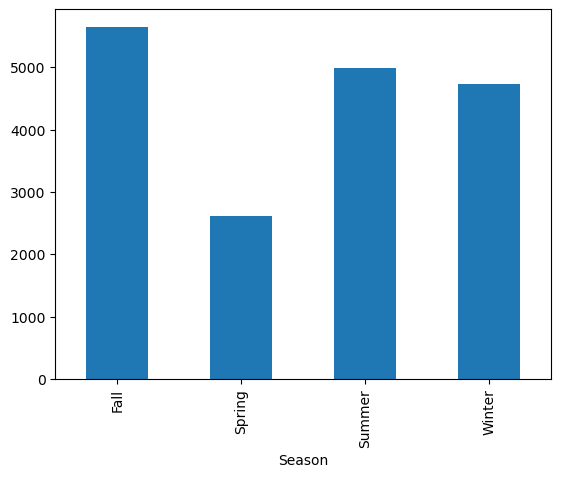

In [26]:
bike.groupby("Season")["Count"].mean().plot.bar()
plt.show()

#### Insights:
 - Less Demand in Spring Season
 - High Demand in Fall Season

#### Weather vs Count

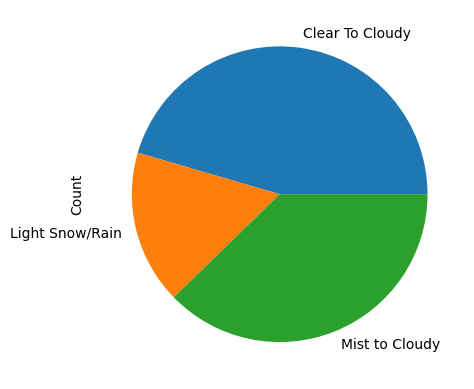

In [27]:
bike.groupby("Weather")["Count"].mean().plot.pie()
plt.show()

#### Insights:
 - Less Demand in Light Snow or Rain weather
 - High Demand in Clear weather

#### Day of Week vs Count

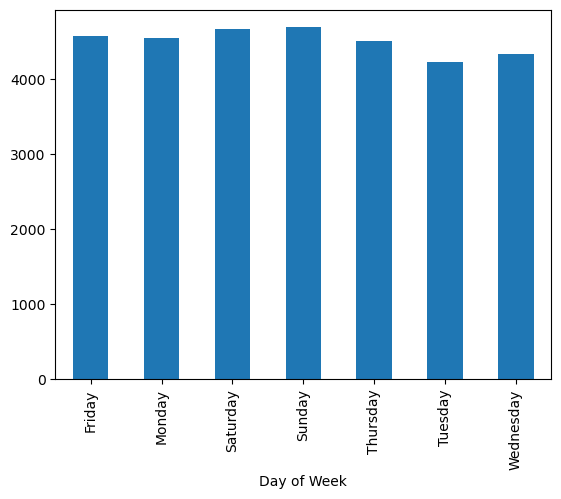

In [28]:
bike.groupby("Day of Week")["Count"].mean().plot.bar()
plt.show()

#### Insights:
 - Weekday is not giving clear picture about demand

#### Year vs Count

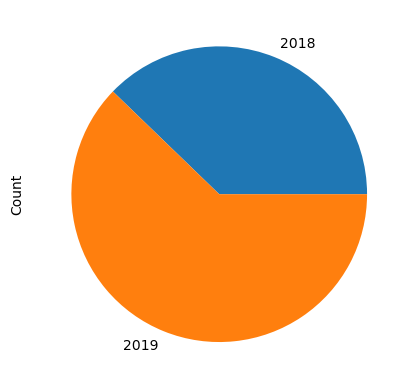

In [29]:
bike.groupby(["Year"])["Count"].sum().plot.pie()
plt.show()

#### Insights:
 - Demand is increased from 2018 to 2019 i.e. people had given good response to Bike Sharing

#### Workingday vs Count

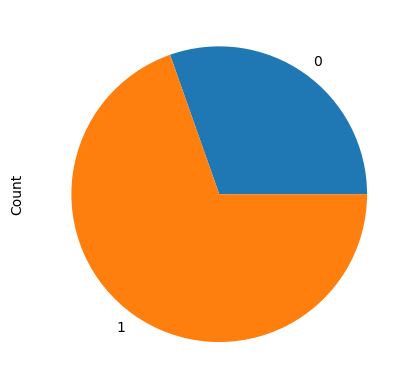

In [30]:
bike.groupby(["Workingday"])["Count"].sum().plot.pie()
plt.show()

#### Insights:
 - People used to use Bike Sharing on Weekday than Holiday or weekend

#### Holiday vs Count

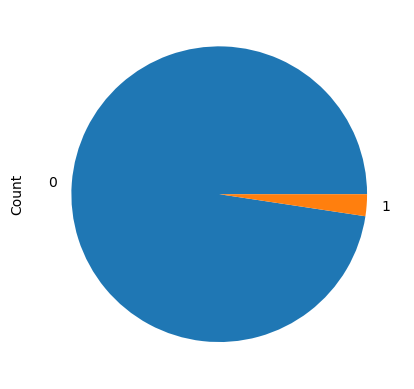

In [31]:
bike.groupby(["Holiday"])["Count"].sum().plot.pie()
plt.show()

#### Insights:
 - Less Demand in Holiday

#### Checking Linear Relationship between Numerical Variables

<Figure size 500x500 with 0 Axes>

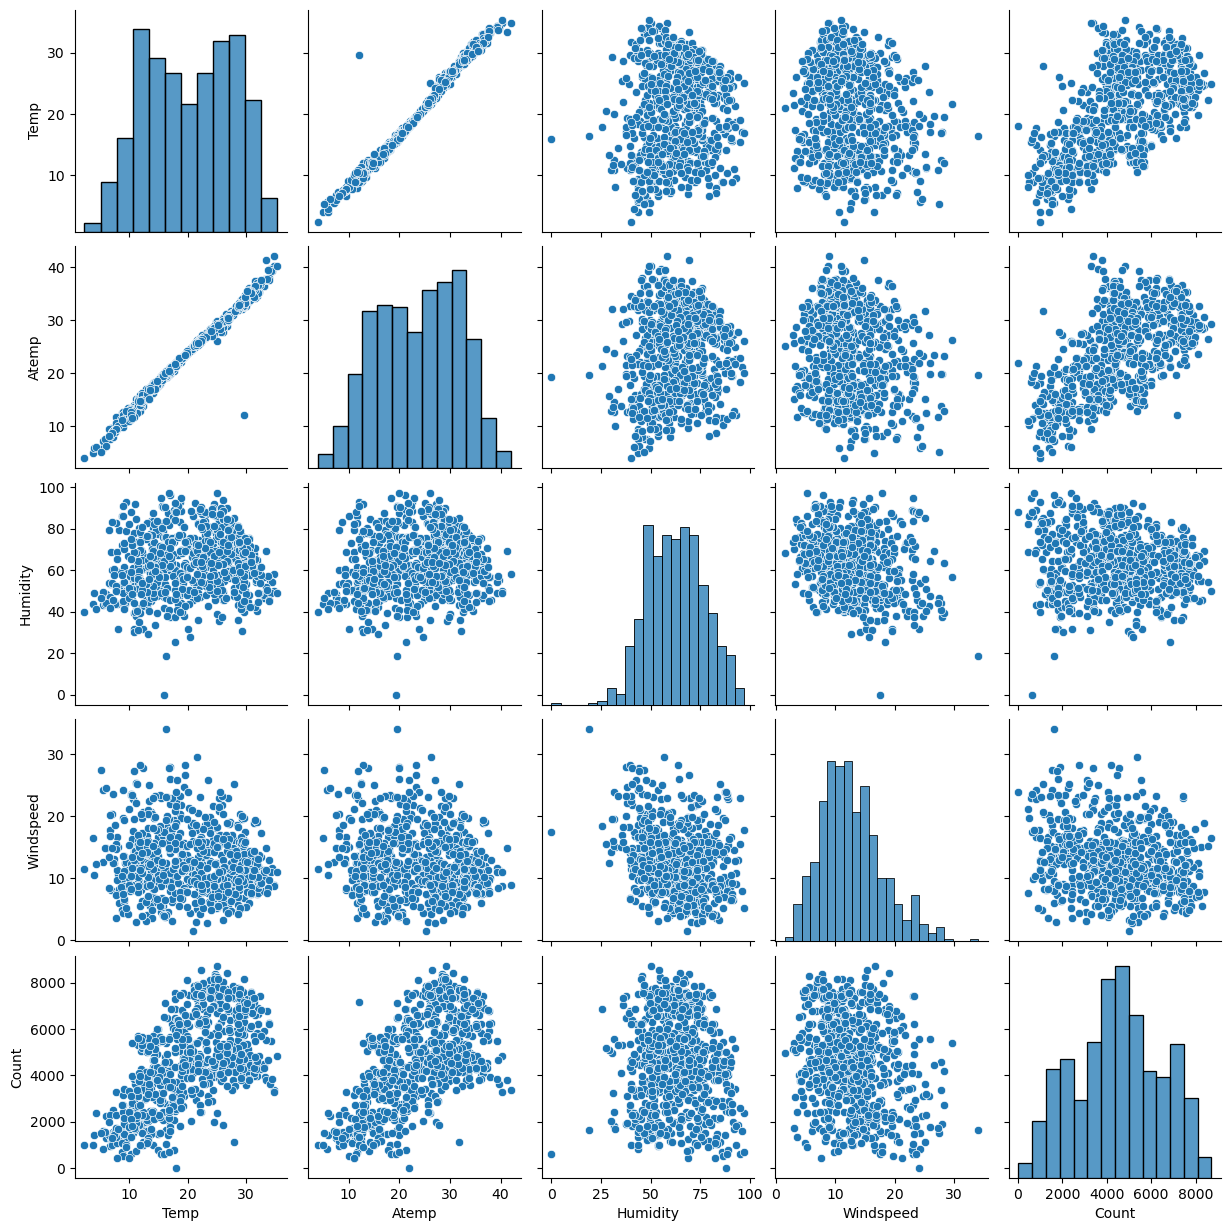

In [32]:
Columns = ["Temp", "Atemp", "Humidity", "Windspeed", "Count"]
plt.figure(figsize = (5,5))
sns.pairplot(bike[Columns])
plt.show()

#### Insights:
 - Looks like the Temp and Atemp has the highest corelation with the target variable Count
 - Temp and Atemp are highly co-related with each other

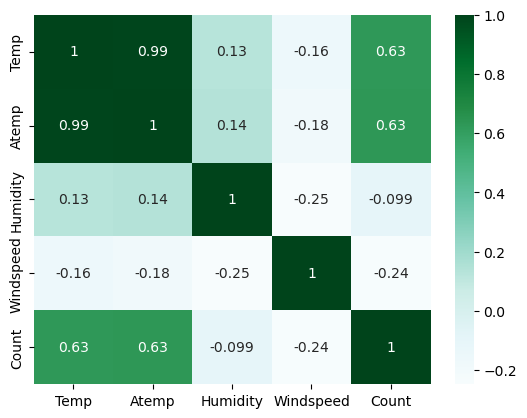

In [33]:
# Checking continuous variables relationship with each other
sns.heatmap(bike[Columns].corr(), cmap='BuGn', annot = True)
plt.show()

#### Insights:
- Here we see that Temp and Atemp has correlation more than .99 means almost 1 (highly correlated) and Atemp seems to be derived from Temp so Atemp field can be dropped here only

#### Analysing Categorical Variables

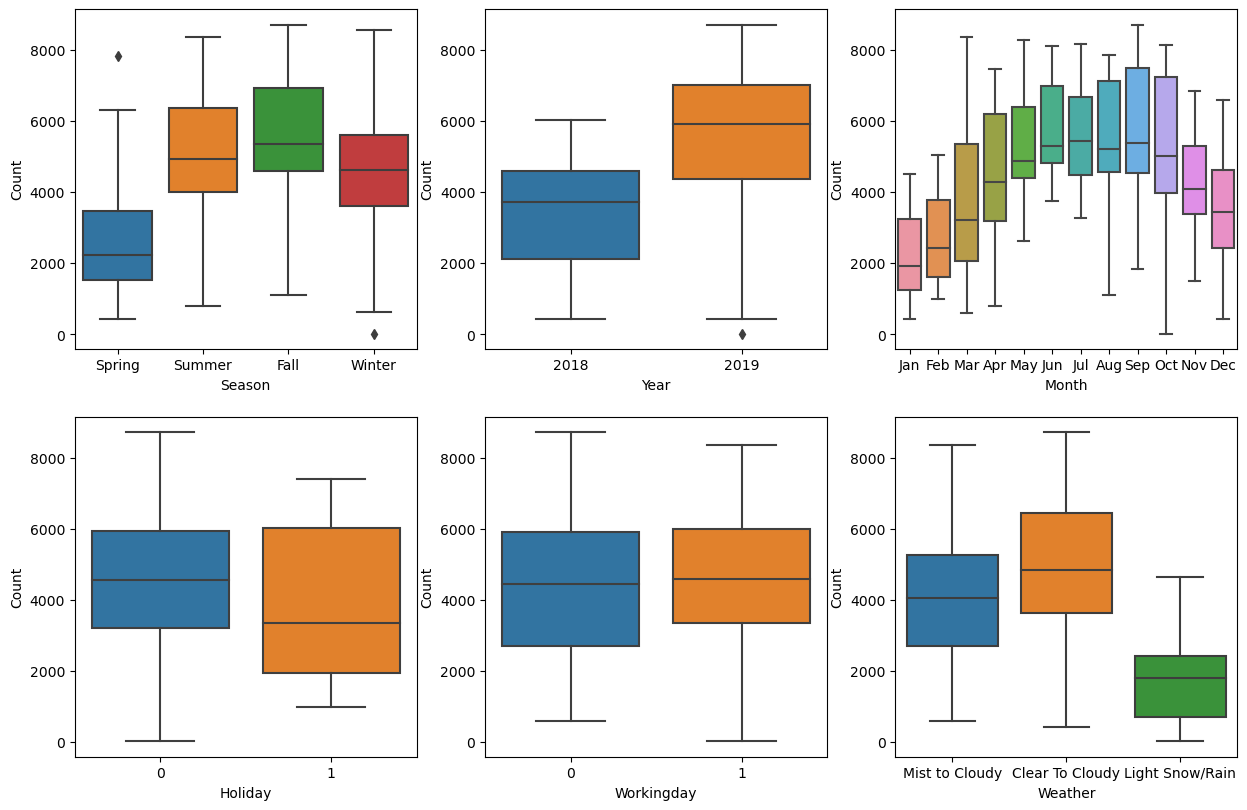

In [34]:
# Boxplot for categorical variables to see demands
Category = ['Season','Year','Month','Holiday','Workingday','Weather']
plt.figure(figsize=(15, 15))
for i in enumerate(Category):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike, x=i[1], y='Count')
plt.show()

#### Insights:

1. Season: Fall has highest demand for rental bikes
2. We can see that demand for next year has grown
3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing
4. When there is a holiday, demand has decreased.
5. Weekday is not giving clear picture abount demand.
6. The clear weather has highest demand
7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.

#### Count vs Temperature

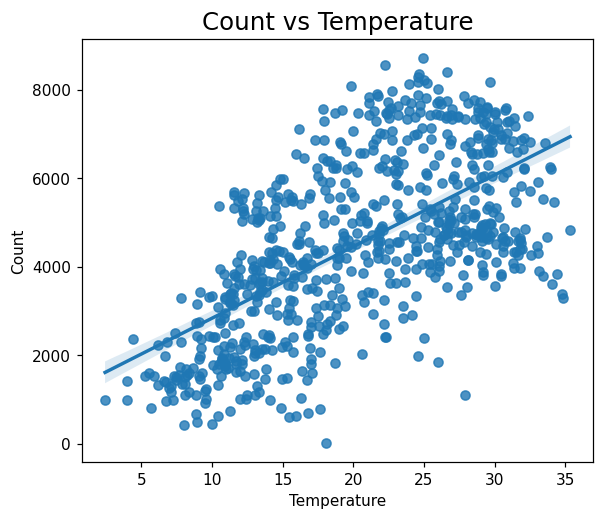

In [35]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Count vs Temperature",fontsize=16)
sns.regplot(data=bike,y="Count",x="Temp")
plt.xlabel("Temperature")
plt.show()

#### Count vs Humidity

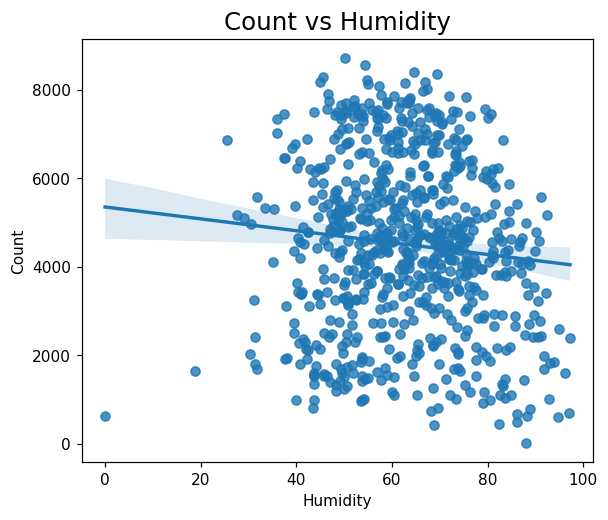

In [36]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Count vs Humidity",fontsize=16)
sns.regplot(data=bike,y="Count",x="Humidity")
plt.xlabel("Humidity")
plt.show()

#### Count vs Windspeed

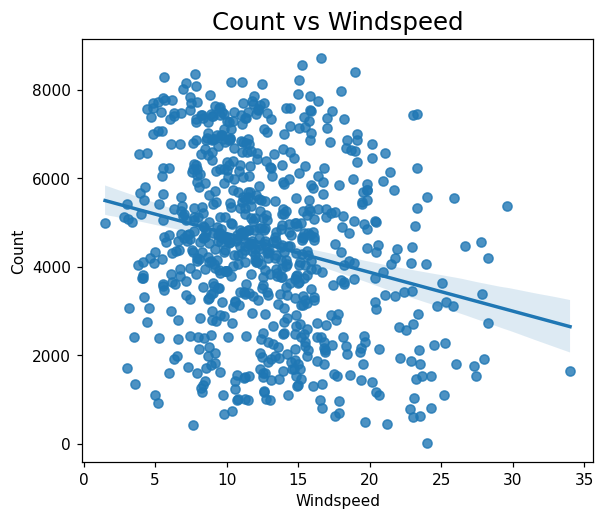

In [37]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Count vs Windspeed",fontsize=16)
sns.regplot(data=bike,y="Count",x="Windspeed")
plt.xlabel("Windspeed")
plt.show()

#### Insights:
 - Demand for bikes is positively correlated to Temp.
 - We can see that Count is linearly increasing with Temp indicating linear relation.
 - Humidity values are more scattered around.
 - Although we can see Count decreasing with increase in Humidity.
 - Windspeed values are more scattered around.
 - Although we can see Count decreasing with increase in Windspeed.

### Step 3: Data Preparation for Linear Regression

#### Creating Dummy variables for all categorical variables

In [38]:
season = pd.get_dummies(bike['Season'], drop_first = True)

In [39]:
season.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [40]:
bike = pd.concat([bike, season], axis = 1)

In [41]:
bike.head()

,Year 1,Holiday,Workingday,Temp,Atemp,Humidity,Windspeed,Count,Season,Month,Year,Day of Week,Weather,Spring,Summer,Winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,Spring,Jan,2018,Monday,Mist to Cloudy,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,Spring,Jan,2018,Tuesday,Mist to Cloudy,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,Spring,Jan,2018,Wednesday,Clear To Cloudy,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,Spring,Jan,2018,Thursday,Clear To Cloudy,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,Spring,Jan,2018,Friday,Clear To Cloudy,1,0,0


In [42]:
weather = pd.get_dummies(bike['Weather'],drop_first = True)

In [43]:
weather.head()

,Light Snow/Rain,Mist to Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [44]:
bike = pd.concat([bike, weather], axis = 1)

In [45]:
bike.head()

,Year 1,Holiday,Workingday,Temp,Atemp,Humidity,Windspeed,Count,Season,Month,Year,Day of Week,Weather,Spring,Summer,Winter,Light Snow/Rain,Mist to Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,Spring,Jan,2018,Monday,Mist to Cloudy,1,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,Spring,Jan,2018,Tuesday,Mist to Cloudy,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,Spring,Jan,2018,Wednesday,Clear To Cloudy,1,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,Spring,Jan,2018,Thursday,Clear To Cloudy,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,Spring,Jan,2018,Friday,Clear To Cloudy,1,0,0,0,0


In [46]:
month = pd.get_dummies(bike['Month'],drop_first = True)

In [47]:
month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [48]:
bike = pd.concat([bike, month], axis = 1)

In [49]:
bike.head()

,Year 1,Holiday,Workingday,Temp,Atemp,Humidity,Windspeed,Count,Season,Month,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,Spring,Jan,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,Spring,Jan,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,Spring,Jan,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,Spring,Jan,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,Spring,Jan,...,0,0,1,0,0,0,0,0,0,0


In [50]:
dayofweek = pd.get_dummies(bike['Day of Week'],drop_first = True)

In [51]:
dayofweek.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [52]:
bike = pd.concat([bike, dayofweek], axis = 1)

In [53]:
bike.head()

,Year 1,Holiday,Workingday,Temp,Atemp,Humidity,Windspeed,Count,Season,Month,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,Spring,Jan,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,Spring,Jan,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,Spring,Jan,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,Spring,Jan,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,Spring,Jan,...,0,0,0,0,0,0,0,0,0,0


In [54]:
bike.columns

Index(['Year 1', 'Holiday', 'Workingday', 'Temp', 'Atemp', 'Humidity',
       'Windspeed', 'Count', 'Season', 'Month', 'Year', 'Day of Week',
       'Weather', 'Spring', 'Summer', 'Winter', 'Light Snow/Rain',
       'Mist to Cloudy', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday'],
      dtype='object')

#### Dropping or removing unwanted columns

In [55]:
bike.drop(['Atemp', 'Day of Week','Season','Weather','Month','Year'], axis = 1, inplace = True)

In [56]:
bike.rename(columns = {'Year 1':'Year'}, inplace=True)

In [57]:
bike.head()

,Year,Holiday,Workingday,Temp,Humidity,Windspeed,Count,Spring,Summer,Winter,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Step 5: Model Building

In [58]:
bike.shape

(730, 29)

#### Split Data into Training and Test

In [59]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Feature Scaling Continuous variables

To make all features in same scale to interpret easily

In [60]:
scaler = MinMaxScaler()

In [61]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['Count', 'Temp', 'Humidity', 'Windspeed']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [62]:
bike_train.head()

,Year,Holiday,Workingday,Temp,Humidity,Windspeed,Count,Spring,Summer,Winter,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,1,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [63]:
bike_train.describe()

,Year,Holiday,Workingday,Temp,Humidity,Windspeed,Count,Spring,Summer,Winter,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.086275,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.281045,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
# y_train to contain only target variable
y_train = bike_train.pop('Count')
X_train = bike_train

### Build a Model using RFE and Automated approach
#### Use RFE to eliminate some columns

In [65]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [66]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('Holiday', True, 1),
 ('Workingday', False, 5),
 ('Temp', True, 1),
 ('Humidity', True, 1),
 ('Windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 3),
 ('Winter', True, 1),
 ('Light Snow/Rain', True, 1),
 ('Mist to Cloudy', False, 2),
 ('Aug', False, 11),
 ('Dec', False, 8),
 ('Feb', False, 9),
 ('Jan', False, 6),
 ('Jul', True, 1),
 ('Jun', False, 17),
 ('Mar', False, 16),
 ('May', False, 10),
 ('Nov', False, 7),
 ('Oct', False, 15),
 ('Sep', True, 1),
 ('Monday', False, 4),
 ('Saturday', False, 18),
 ('Sunday', False, 19),
 ('Thursday', False, 14),
 ('Tuesday', False, 12),
 ('Wednesday', False, 13)]

In [67]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]
Columns = X_train.columns[rfe.support_]
Columns

Index(['Year', 'Holiday', 'Temp', 'Humidity', 'Windspeed', 'Spring', 'Winter',
       'Light Snow/Rain', 'Jul', 'Sep'],
      dtype='object')

In [68]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['Workingday', 'Summer', 'Mist to Cloudy', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [69]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[Columns]

In [70]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [71]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [72]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          1.53e-184
Time:                        15:26:41   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3769      0.031     

In [73]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,56.13
3,Temp,2.87
6,Spring,2.53
7,Winter,1.75
9,Jul,1.29
4,Humidity,1.26
5,Windspeed,1.15
8,Light Snow/Rain,1.11
10,Sep,1.11
1,Year,1.03


In [74]:
# Print Columns 
X_train_rfe.columns

Index(['const', 'Year', 'Holiday', 'Temp', 'Humidity', 'Windspeed', 'Spring',
       'Winter', 'Light Snow/Rain', 'Jul', 'Sep'],
      dtype='object')

In [75]:
# Dropping column const
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [76]:
# Print all columns
X_train_new.columns

Index(['Year', 'Holiday', 'Temp', 'Humidity', 'Windspeed', 'Spring', 'Winter',
       'Light Snow/Rain', 'Jul', 'Sep'],
      dtype='object')

In [77]:
# Calculate the VIFs after dropping const column
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Humidity,15.18
2,Temp,13.09
4,Windspeed,4.02
5,Spring,2.40
0,Year,2.06
6,Winter,1.98
8,Jul,1.40
9,Sep,1.20
7,Light Snow/Rain,1.11
1,Holiday,1.04


##### As we can see column Humidity is having HIGH VIF and hence, we will remove Humidity and build new model

In [78]:
X_train_new = X_train_new.drop(["Humidity"], axis = 1)

In [79]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          5.33e-171
Time:                        15:26:43   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2042      0.025     

In [80]:
# Calculate the VIFs for new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Temp,4.40
3,Windspeed,3.98
0,Year,2.06
4,Spring,1.61
5,Winter,1.37
7,Jul,1.34
8,Sep,1.20
6,Light Snow/Rain,1.06
1,Holiday,1.04


#### Insights:
Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.805. Hence, we select this Model as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

In [81]:
X_train_new.head()

,Year,Holiday,Temp,Windspeed,Spring,Winter,Light Snow/Rain,Jul,Sep
653,1,0,0.509887,0.300794,0,1,0,0,0
576,1,0,0.815169,0.264686,0,0,0,1,0
426,1,0,0.442393,0.255342,1,0,0,0,0
728,1,0,0.245101,0.663106,1,0,0,0,0
482,1,0,0.395666,0.188475,0,0,0,0,0


### Residual Analysis

#### So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [82]:
y_train_pred = lm.predict(X_train_lm)

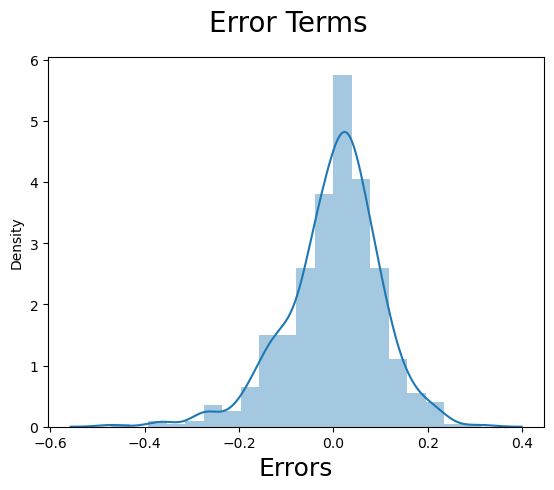

In [83]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

#### Insights:
 - Errors are normally distribured here with mean 0. So everything seems to be fine
 

#### Here, we check if Error terms are independent of each other:

In [84]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8046289610874561

#### Insights:
 - R2 Same as we obtained for our final model

#### Here, we check if there is a linear relationship between X and Y:

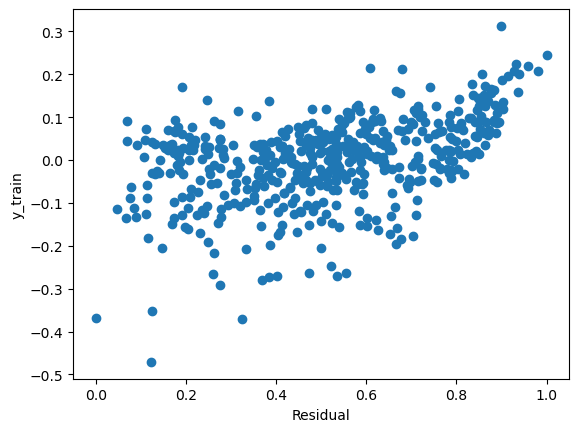

In [85]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### Predict values for test data set

In [86]:
# Scale variables in bike_test
num_vars = ['Count', 'Temp', 'Humidity', 'Windspeed']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [87]:
# y_test to contain only target variable
y_test = bike_test.pop('Count')
X_test = bike_test

In [88]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [89]:
# Making predictions
y_pred = lm.predict(X_test_new)

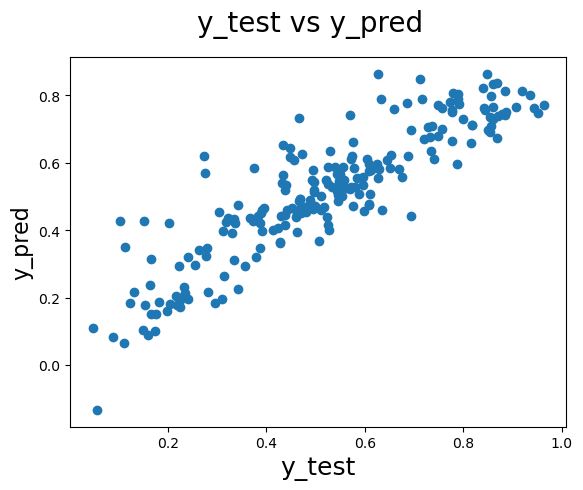

In [90]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)    
plt.show()

We can see that the equation of our best fiited line is:

Count = 0.476xTemp -0.133xWindspeed + 0.235xYear - 0.476xSpring  + 0.050xWinter - 0.062xJul + 0.50xSep - 0.256xLight Snow/Rain y - 0.086xHoliday

#### Model Evaluation

In [91]:
# Calculate the R-squared score on the test set
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7888

#### Insights:
- R2 value for predictions on test data (0.788) is almost same as R2 value of train data(0.805). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

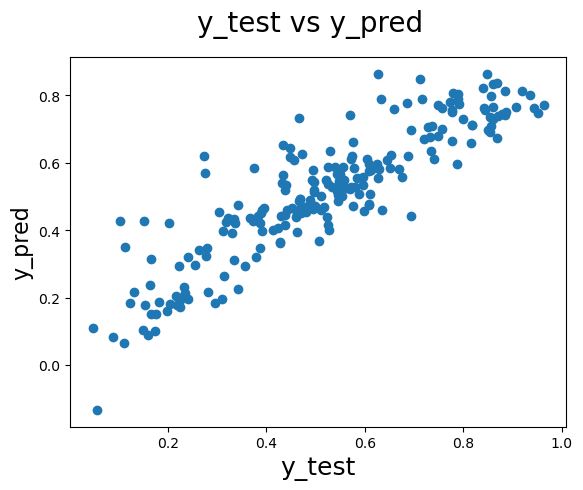

In [92]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)
plt.show()

#### Insights:
 - We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

### Interepretation of results

#### Analysing the above model, the comapany should focus on the following features:
 - Company should focus on expanding business during Winter and Fall.
 - Company should focus on expanding business during September.
 - Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
 - There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.
 - There would be less bookings during Holiday.

#### Hence when the situation comes back to normal, the company should come up with new offers during Fall, Winter when the weather is pleasant and also advertise a little for September as this is when business would be at its best.

#### Significant variables to predict the demand for shared bikes:
- Holiday
- Temp
- Humidity
- Windspeed
- Season
- Months
- Weather